In [38]:
!pip install requests beautifulsoup4
import requests
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup


def fetch_page(url):
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup
  else:
    return None

In [39]:
def index_words(soup):
  index = {}
  words = re.findall(r'\w+', soup.get_text())
  for word in words:
    word = word.lower()
    if word in index:
      index[word] += 1
    else:
      index[word] = 1
  return index


In [40]:
def remove_stop_words(index):
  stop_words = {'a', 'an', 'the', 'and', 'or','in', 'on', 'at'}
  for stop_word in stop_words:
    if stop_word in index:
      del index[stop_word]
  return index


In [41]:
def apply_stemming(index):
  stemmer = PorterStemmer()
  stemmed_index = {}
  for word, count in index.items():
    stemmed_word = stemmer.stem(word)
    if stemmed_word in stemmed_index:
      stemmed_index[stemmed_word] += count
    else:
      stemmed_index[stemmed_word] = count
  return stemmed_index


In [42]:
def search(query, index):
  stemmer = PorterStemmer()
  query_words = re.findall(r'\w+', query.lower())
  results = {}
  for word in query_words:
    word = stemmer.stem(word)
    if word in index:
      results[word] = index[word]
  return results


In [43]:
def search_engine(url, query):
  soup = fetch_page(url)
  if soup is None:
    return None
  index = index_words(soup)
  index = remove_stop_words(index)
  index = apply_stemming(index)
  results = search(query, index)
  return results


In [44]:
!pip install firebase
from firebase import firebase
FBconn = firebase.FirebaseApplication('https://tergol6-ae9fb-default-rtdb.firebaseio.com/',None)

In [58]:
url = 'https://cad.onshape.com/help/Content/Glossary/glossary.htm?tocpath=_____19'
query = 'point keyboard context plan type draw opens allow sketch part'
results = search_engine(url, query)

print("The Results:")

for word, count in results.items():
  print(f"{word}: {count}")

rank = 1
for word, count in results.items():
  rank = rank*1/count
rank = 1-rank
print("The Rank is:",rank)

result = FBconn.post('/Result',results)


The Results:
point: 74
keyboard: 631
context: 676
plan: 626
type: 656
draw: 226
open: 61
allow: 67
sketch: 220
part: 524
The Rank is: 1.0


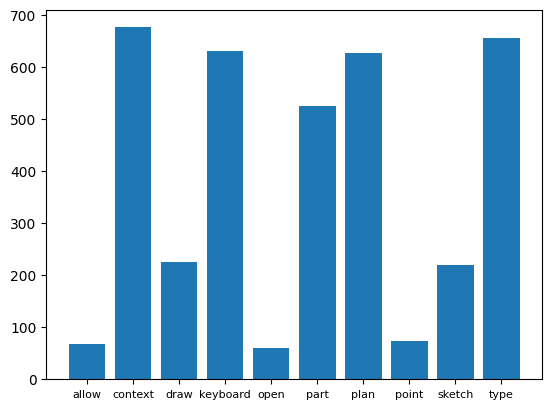

In [64]:
import matplotlib.pyplot as plt

FBconn = firebase.FirebaseApplication('https://tergol6-ae9fb-default-rtdb.firebaseio.com/',None)
result=FBconn.get('Result',None)
dic = {}
for value in result.values():
  dic.update(value)
plt.bar(dic.keys(), dic.values())
plt.xticks(fontsize=8)
plt.show()